In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import re
import math
from pandas_summary import DataFrameSummary

In [3]:
train_file = "train_data.csv"
test_file = "test.csv"

In [4]:
def straight_dist(x_start, x_end, y_start, y_end):
    return np.sqrt((x_end - x_start)**2 + (y_end - y_start)**2)

def calc_azt(x_start, x_end, y_start, y_end ):
    return math.degrees(math.atan2(y_end - y_start, x_end - x_start)) // 45

def coordinates_bin(coor):
    return coor // 50 + 21

def convert_ts_to_datetime(ts):
    return datetime.datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')

def get_weekday(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.weekday()

def is_weekend(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.weekday() >= 5

def get_day(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.day

def get_month(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.month

def get_year(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.year

def get_hour(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.hour

def get_minute(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.minute // 10

def time_classification(ts):
    hour = get_hour(ts)
    if hour <= 5:
        return "Midnight"
    if hour <= 8:
        return "Morning"
    if hour <= 11:
        return "Noon"
    if hour <= 18:
        return "Afternoon"
    if hour <= 20:
        return "Night"
    else:
        return "LateNight"

In [5]:
vec_straight_dist = np.vectorize(straight_dist)
vec_calc_azt = np.vectorize(calc_azt)
vec_coordinates_bin = np.vectorize(coordinates_bin)
vec_get_weekday = np.vectorize(get_weekday)
vec_is_weekend = np.vectorize(is_weekend)
vec_get_day = np.vectorize(get_day)
vec_get_month = np.vectorize(get_month)
vec_get_year = np.vectorize(get_year)
vec_get_hour = np.vectorize(get_hour)
vec_get_minute = np.vectorize(get_minute)
vec_time_classification = np.vectorize(time_classification)

In [6]:
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)
df_train_simple = df_train[[u'ID', u'TAXI_ID', u'TIMESTAMP', u'X_START', u'Y_START', u'X_END',
       u'Y_END']]
df_all = pd.concat([df_train_simple, df_test])

In [7]:
df_train

,ID,TAXI_ID,TIMESTAMP,DURATION,X_START,Y_START,X_END,Y_END,X_TRAJECTORY,Y_TRAJECTORY,TRAJ_LENGTH
0,1,127,2009-03-07 07:48:56,223,-223,-350,-124,-39,"-223, -225, -225, -221, -217, -209, -212, -204...","-350, -347, -342, -336, -329, -321, -324, -324...",439
1,2,420,2008-07-18 09:24:20,359,-257,-73,-326,-292,"-257, -257, -260, -262, -263, -263, -262, -262...","-73, -75, -86, -100, -111, -121, -133, -138, -...",260
2,3,56,2009-03-10 10:29:21,162,-320,-300,-332,-254,"-320, -324, -329, -334, -340, -340, -340, -340...","-300, -301, -301, -297, -298, -295, -295, -294...",135
3,4,133,2008-09-03 15:27:24,124,-352,-233,-380,-189,"-352, -354, -356, -356, -356, -356, -356, -356...","-233, -233, -234, -234, -234, -233, -234, -230...",70
4,5,545,2008-09-22 13:15:52,219,-350,-232,-301,-300,"-350, -350, -350, -350, -350, -352, -355, -354...","-232, -232, -232, -232, -232, -232, -233, -236...",117
5,6,795,2009-01-12 15:19:20,231,-319,-253,-116,-279,"-319, -311, -308, -305, -301, -293, -291, -285...","-253, -248, -245, -242, -236, -229, -227, -220...",405
6,7,33,2008-11-04 16:21:52,287,-360,-273,-308,-266,"-360, -355, -354, -353, -353, -352, -349, -348...","-273, -272, -270, -269, -269, -268, -265, -264...",165
7,8,236,2008-10-20 17:09:53,217,-284,-298,-319,-240,"-284, -283, -283, -283, -284, -284, -285, -287...","-298, -297, -297, -297, -294, -290, -286, -283...",102
8,9,96,2009-02-16 17:10:03,134,-303,-98,-301,-142,"-303, -300, -293, -291, -291, -291, -291, -289...","-98, -103, -108, -109, -109, -109, -109, -110,...",55
9,10,462,2009-02-23 22:39:13,242,-329,-276,-236,-252,"-329, -327, -329, -330, -330, -331, -329, -326...","-276, -277, -282, -284, -284, -284, -288, -292...",163


In [8]:
n_train = df_train.shape[0]
n_test = df_test.shape[0]
print df_train.shape
print df_test.shape
print df_train.columns
print df_test.columns

(465172, 11)
(465172, 7)
Index([u'ID', u'TAXI_ID', u'TIMESTAMP', u'DURATION', u'X_START', u'Y_START',
       u'X_END', u'Y_END', u'X_TRAJECTORY', u'Y_TRAJECTORY', u'TRAJ_LENGTH'],
      dtype='object')
Index([u'ID', u'TAXI_ID', u'TIMESTAMP', u'X_START', u'Y_START', u'X_END',
       u'Y_END'],
      dtype='object')


In [9]:
DataFrameSummary(df_train).summary()

,ID,TAXI_ID,TIMESTAMP,DURATION,X_START,Y_START,X_END,Y_END,X_TRAJECTORY,Y_TRAJECTORY,TRAJ_LENGTH
count,465172,465172,NaN,465172,465172,465172,465172,465172,NaN,NaN,465172
mean,232586,324.12,NaN,253.242,-274.488,-248.023,-243.426,-238.723,NaN,NaN,242.228
std,134284,213.339,NaN,108.412,79.727,76.579,117.362,95.0577,NaN,NaN,149.919
min,1,1,NaN,120,-381,-415,-431,-419,NaN,NaN,21
25%,116294,148,NaN,174,-340,-296,-330,-300,NaN,NaN,137
50%,232586,298,NaN,226,-296,-272,-267,-263,NaN,NaN,200
75%,348879,454,NaN,301,-223,-202,-190,-191,NaN,NaN,303
max,465172,800,NaN,883,-42,-12,426,68,NaN,NaN,999
counts,465172,465172,465172,465172,465172,465172,465172,465172,465172,465172,465172
uniques,465172,800,461201,752,340,404,849,488,465172,465172,979


In [10]:
DataFrameSummary(df_test).summary()

,ID,TAXI_ID,TIMESTAMP,X_START,Y_START,X_END,Y_END
count,465172,465172,NaN,465172,465172,465172,465172
mean,697758,324.228,NaN,-274.316,-248.352,-243.017,-238.544
std,134284,213.566,NaN,79.921,76.231,117.589,95.2304
min,465173,1,NaN,-381,-415,-431,-419
25%,581466,148,NaN,-340,-296,-330,-300
50%,697758,297,NaN,-296,-272,-266,-263
75%,814051,455,NaN,-223,-203,-190,-191
max,930344,800,NaN,-42,-12,426,68
counts,465172,465172,465172,465172,465172,465172,465172
uniques,465172,800,461336,340,404,853,488


In [19]:
df_train['STRAIGHT_DIST'] = vec_straight_dist(df_train['X_START'], df_train['X_END'], df_train['Y_START'], df_train['Y_END'])

In [26]:
df_train.iloc[11145].X_TRAJECTORY

'-138, -145, -153, -165, -178, -191, -203, -201, -195, -194, -194, -194, -194, -194, -195, -196, -181, -168, -162, -154, -146, -138, -133, -130, -139, -148, -151, -165, -186, -204, -219, -221, -223, -224, -227, -233, -235, -238, -243, -245, -249, -246, -243, -244, -243, -241, -237, -233, -229, -229, -229, -227, -222, -218, -211, -210, -203, -184, -163, -152, -149, -140, -131, -133, -138, -145, -155, -164, -171, -187, -208, -213, -199, -196, -196, -196, -196, -202, -203, -197, -183, -170, -158, -153'

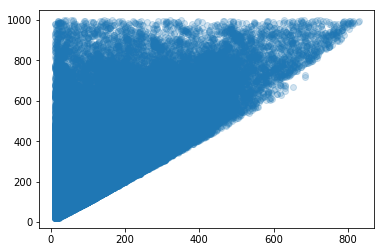

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df_train['STRAIGHT_DIST'], df_train['TRAJ_LENGTH'], alpha=0.2)
plt.show()

In [11]:
from datetime import date, timedelta
train_date = pd.to_datetime(np.unique(df_train['TIMESTAMP'])).normalize()
test_date = pd.to_datetime(np.unique(df_test['TIMESTAMP'])).normalize()
date_set = set(train_date[0] + timedelta(x) for x in range((train_date[-1] - train_date[0]).days))
print "Start-date : " +  str(train_date[0])
print "End-date : "  + str(train_date[-1])
missing = sorted(date_set - set(train_date))
missing

Start-date : 2008-03-03 00:00:00
End-date : 2009-05-25 00:00:00


[]

In [12]:
from sklearn.cluster import MiniBatchKMeans, KMeans

In [16]:
x_coors = np.concatenate([df_all['X_START'], df_all['X_END']])
y_coors = np.concatenate([df_all['Y_START'], df_all['Y_END']])
all_coors = np.vstack((x_coors, y_coors)).T
k_means_model = KMeans(init='k-means++', n_clusters=100, n_init=10, n_jobs=-1).fit(all_coors)

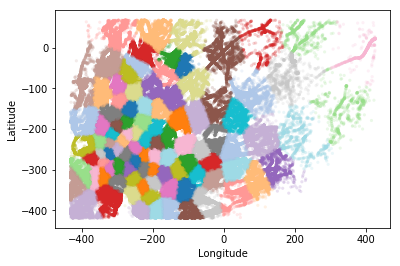

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(all_coors[:,0], all_coors[:,1], s=10, lw=0, cmap='tab20', alpha=0.2, c = k_means_model.predict(all_coors))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [47]:
def get_basic_features_train(df):
    duration_train = df['DURATION'].values
    traj_train = df['TRAJ_LENGTH'].values
    price_train = duration_train + traj_train
    df['LOG_DURATION'] = np.log(duration_train)
    df['LOG_TRAJLENGTH'] = np.log(traj_train)
    df['LOG_PRICE'] = np.log(price_train)
    df['LOG_STRAIGHT_DIST'] = np.log(vec_straight_dist(df['X_START'], df['X_END'], df['Y_START'], df['Y_END']))
    df['AZT'] = vec_calc_azt(df['X_START'], df['X_END'], df['Y_START'], df['Y_END'])
    df['DAYOFWEEK'] = vec_get_weekday(df['TIMESTAMP'])
    df['DATE'] = pd.to_datetime(df['TIMESTAMP'].values).normalize().astype(str)
    df['DAY'] = vec_get_day(df['TIMESTAMP'])
    df['MONTH'] = vec_get_month(df['TIMESTAMP'])
    df['YEAR'] = vec_get_year(df['TIMESTAMP'])
    df['HOUR'] = vec_get_hour(df['TIMESTAMP'])
    df['MINUTE'] = vec_get_minute(df['TIMESTAMP'])
    df['TIME_CLASS'] = vec_time_classification(df['TIMESTAMP'])
    start_coors = np.vstack((df['X_START'], df['Y_START'])).T
    end_coors = np.vstack((df['X_END'], df['Y_END'])).T
    df['START_BIN'] = k_means_model.predict(start_coors)
    df['END_BIN'] = k_means_model.predict(end_coors)
    return df

def get_basic_features_test(df):
    df['LOG_STRAIGHT_DIST'] = np.log(vec_straight_dist(df['X_START'], df['X_END'], df['Y_START'], df['Y_END']))
    df['AZT'] = vec_calc_azt(df['X_START'], df['X_END'], df['Y_START'], df['Y_END'])
    df['DAYOFWEEK'] = vec_get_weekday(df['TIMESTAMP'])
    df['DATE'] = pd.to_datetime(df['TIMESTAMP'].values).normalize().astype(str)
    df['DAY'] = vec_get_day(df['TIMESTAMP'])
    df['MONTH'] = vec_get_month(df['TIMESTAMP'])
    df['YEAR'] = vec_get_year(df['TIMESTAMP'])
    df['HOUR'] = vec_get_hour(df['TIMESTAMP'])
    df['MINUTE'] = vec_get_minute(df['TIMESTAMP'])
    df['TIME_CLASS'] = vec_time_classification(df['TIMESTAMP'])
    start_coors = np.vstack((df['X_START'], df['Y_START'])).T
    end_coors = np.vstack((df['X_END'], df['Y_END'])).T
    df['START_BIN'] = k_means_model.predict(start_coors)
    df['END_BIN'] = k_means_model.predict(end_coors)
    return df

In [48]:
df_train_basic = get_basic_features_train(df_train)
df_test_basic = get_basic_features_test(df_test)

In [99]:
log_duration = df_train_basic['LOG_DURATION'].values
log_trajlength = df_train_basic['LOG_TRAJLENGTH'].values
log_price = df_train_basic['LOG_PRICE'].values

In [49]:
print df_train_basic.shape
print df_test_basic.shape
print df_train_basic.columns
print df_test_basic.columns

(465172, 26)
(465172, 19)
Index([u'ID', u'TAXI_ID', u'TIMESTAMP', u'DURATION', u'X_START', u'Y_START',
       u'X_END', u'Y_END', u'X_TRAJECTORY', u'Y_TRAJECTORY', u'TRAJ_LENGTH',
       u'LOG_DURATION', u'LOG_TRAJLENGTH', u'LOG_PRICE', u'LOG_STRAIGHT_DIST',
       u'AZT', u'DAYOFWEEK', u'DATE', u'DAY', u'MONTH', u'YEAR', u'HOUR',
       u'MINUTE', u'TIME_CLASS', u'START_BIN', u'END_BIN'],
      dtype='object')
Index([u'ID', u'TAXI_ID', u'TIMESTAMP', u'X_START', u'Y_START', u'X_END',
       u'Y_END', u'LOG_STRAIGHT_DIST', u'AZT', u'DAYOFWEEK', u'DATE', u'DAY',
       u'MONTH', u'YEAR', u'HOUR', u'MINUTE', u'TIME_CLASS', u'START_BIN',
       u'END_BIN'],
      dtype='object')


In [50]:
df_train_basic_simple = df_train_basic[[u'ID', u'TAXI_ID', u'TIMESTAMP', u'X_START', u'Y_START', u'X_END',
       u'Y_END', u'LOG_STRAIGHT_DIST', u'AZT', u'DAYOFWEEK', u'DATE', u'DAY',
       u'MONTH', u'YEAR', u'HOUR', u'MINUTE', u'TIME_CLASS', u'START_BIN',
       u'END_BIN']]
df_all_basic = pd.concat((df_train_basic_simple, df_test_basic))

print df_all_basic.shape
print df_all_basic.columns

(930344, 19)
Index([u'ID', u'TAXI_ID', u'TIMESTAMP', u'X_START', u'Y_START', u'X_END',
       u'Y_END', u'LOG_STRAIGHT_DIST', u'AZT', u'DAYOFWEEK', u'DATE', u'DAY',
       u'MONTH', u'YEAR', u'HOUR', u'MINUTE', u'TIME_CLASS', u'START_BIN',
       u'END_BIN'],
      dtype='object')


In [51]:
def create_dict_date(df_train, df_all):
    result_dict = {}
    column = ['DATE', 'TAXI_ID', 'DATE', 'MONTH', 'YEAR', 'DAYOFWEEK', 'TIME_CLASS', 'START_BIN', 'END_BIN']
    for column_names in column:
        indiv_dict = {}
        duration = df_train.groupby(column_names)['LOG_DURATION'].mean()
        mean_duration = duration.mean()
        price = df_train.groupby(column_names)['LOG_PRICE'].mean()
        mean_price = price.mean()
        trajlength = df_train.groupby(column_names)['LOG_TRAJLENGTH'].mean()
        mean_trajlength = trajlength.mean()
        count = df_all.groupby(column_names)[column_names].count()
        mean_count = count.mean()
        for index in duration.index:
            indiv_dict[str(index)] = {
                'duration' : duration[index],
                'price' : price[index],
                'trajlength' : trajlength[index],
                'count' : count[index]
            }
            indiv_dict['avg'] = {
                'duration' : mean_duration,
                'price' : mean_price,
                'trajlength' : mean_trajlength,
                'count' : mean_count
            }
        result_dict[column_names] = indiv_dict
    return result_dict

In [58]:
def get_mean_values(array_column, result_dict, column_name):
    n_obs = len(array_column)
    column_dict = result_dict[column_name]
    column_dict_index = column_dict.keys()
    result_duration = np.zeros(n_obs)
    result_price = np.zeros(n_obs)
    result_trajlength = np.zeros(n_obs)
    result_count = np.zeros(n_obs)
    for idx in range(n_obs):
        target = str(array_column[idx])
        if target not in column_dict_index:
            print str(target) + " is not found"
            result_duration[idx] = column_dict['avg']['duration']
            result_price[idx] = column_dict['avg']['price']
            result_trajlength[idx] = column_dict['avg']['trajlength']
            result_count[idx] = column_dict['avg']['count']
        else:
            result_duration[idx] = column_dict[target]['duration']
            result_price[idx] = column_dict[target]['price']
            result_trajlength[idx] = column_dict[target]['trajlength']
            result_count[idx] = column_dict[target]['count']
    return result_duration, result_price, result_trajlength, result_count

In [61]:
def get_advanced_features(df, result_dict):
    column = ['DATE', 'TAXI_ID', 'DATE', 'MONTH', 'YEAR', 'DAYOFWEEK', 'TIME_CLASS', 'START_BIN', 'END_BIN']
    for column_names in column:  
        result_duration, result_price, result_trajlength, result_count = get_mean_values(df[column_names].values, result_dict, column_names)
        df['LOGDURATION_BY_' + column_names] = result_duration
        df['LOGPRICE_BY_' + column_names] = result_price
        df['LOGTRAJLENGTH_BY_' + column_names] = result_trajlength
        df['COUNT_BY_' + column_names] = result_count
    return df

In [75]:
result_dict = create_dict_date(df_train_basic, df_all_basic)
df_all_advanced = get_advanced_features(df_all_basic, result_dict)

85 is not found
85 is not found


In [76]:
print df_all_advanced.shape
print df_all_advanced.columns

(930344, 51)
Index([u'ID', u'TAXI_ID', u'TIMESTAMP', u'X_START', u'Y_START', u'X_END',
       u'Y_END', u'LOG_STRAIGHT_DIST', u'AZT', u'DAYOFWEEK', u'DATE', u'DAY',
       u'MONTH', u'YEAR', u'HOUR', u'MINUTE', u'TIME_CLASS', u'START_BIN',
       u'END_BIN', u'LOGDURATION_BY_DATE', u'LOGPRICE_BY_DATE',
       u'LOGTRAJLENGTH_BY_DATE', u'COUNT_BY_DATE', u'LOGDURATION_BY_TAXI_ID',
       u'LOGPRICE_BY_TAXI_ID', u'LOGTRAJLENGTH_BY_TAXI_ID',
       u'COUNT_BY_TAXI_ID', u'LOGDURATION_BY_MONTH', u'LOGPRICE_BY_MONTH',
       u'LOGTRAJLENGTH_BY_MONTH', u'COUNT_BY_MONTH', u'LOGDURATION_BY_YEAR',
       u'LOGPRICE_BY_YEAR', u'LOGTRAJLENGTH_BY_YEAR', u'COUNT_BY_YEAR',
       u'LOGDURATION_BY_DAYOFWEEK', u'LOGPRICE_BY_DAYOFWEEK',
       u'LOGTRAJLENGTH_BY_DAYOFWEEK', u'COUNT_BY_DAYOFWEEK',
       u'LOGDURATION_BY_TIME_CLASS', u'LOGPRICE_BY_TIME_CLASS',
       u'LOGTRAJLENGTH_BY_TIME_CLASS', u'COUNT_BY_TIME_CLASS',
       u'LOGDURATION_BY_START_BIN', u'LOGPRICE_BY_START_BIN',
       u'LOGTRAJLENGTH

In [77]:
pd.options.display.max_columns = 70
DataFrameSummary(df_all_advanced).summary()

,ID,TAXI_ID,TIMESTAMP,X_START,Y_START,X_END,Y_END,LOG_STRAIGHT_DIST,AZT,DAYOFWEEK,DATE,DAY,MONTH,YEAR,HOUR,MINUTE,TIME_CLASS,START_BIN,END_BIN,LOGDURATION_BY_DATE,LOGPRICE_BY_DATE,LOGTRAJLENGTH_BY_DATE,COUNT_BY_DATE,LOGDURATION_BY_TAXI_ID,LOGPRICE_BY_TAXI_ID,LOGTRAJLENGTH_BY_TAXI_ID,COUNT_BY_TAXI_ID,LOGDURATION_BY_MONTH,LOGPRICE_BY_MONTH,LOGTRAJLENGTH_BY_MONTH,COUNT_BY_MONTH,LOGDURATION_BY_YEAR,LOGPRICE_BY_YEAR,LOGTRAJLENGTH_BY_YEAR,COUNT_BY_YEAR,LOGDURATION_BY_DAYOFWEEK,LOGPRICE_BY_DAYOFWEEK,LOGTRAJLENGTH_BY_DAYOFWEEK,COUNT_BY_DAYOFWEEK,LOGDURATION_BY_TIME_CLASS,LOGPRICE_BY_TIME_CLASS,LOGTRAJLENGTH_BY_TIME_CLASS,COUNT_BY_TIME_CLASS,LOGDURATION_BY_START_BIN,LOGPRICE_BY_START_BIN,LOGTRAJLENGTH_BY_START_BIN,COUNT_BY_START_BIN,LOGDURATION_BY_END_BIN,LOGPRICE_BY_END_BIN,LOGTRAJLENGTH_BY_END_BIN,COUNT_BY_END_BIN
count,930344,930344,NaN,930344,930344,930344,930344,930344,930344,930344,NaN,930344,930344,930344,930344,930344,NaN,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344
mean,465172,324.174,NaN,-274.402,-248.188,-243.222,-238.633,4.84334,-0.373445,3.01016,NaN,15.7317,6.49534,2008.29,12.1656,2.52827,NaN,40.6702,43.8316,5.4572,6.11191,5.32225,2363.79,5.45724,6.11183,5.32204,1518.99,5.45725,6.1119,5.32218,77672.8,5.45728,6.11191,5.32217,546022,5.4572,6.11191,5.32224,133893,5.45733,6.11193,5.32214,209455,5.45739,6.11204,5.3223,29566,5.45735,6.11227,5.32283,15121.5
std,268567,213.452,NaN,79.8241,76.4053,117.475,95.1441,0.644364,2.16616,1.9492,NaN,8.79776,3.44332,0.454476,6.08359,1.71911,NaN,27.4566,28.5178,0.0502861,0.0223373,0.037782,540.525,0.0496814,0.0526438,0.086182,666.051,0.0185062,0.0127656,0.011625,3373.59,0.000540602,0.00213636,0.00547919,176274,0.043414,0.0110534,0.0302779,11677.7,0.0691044,0.0210306,0.0662386,110914,0.0676309,0.112083,0.181969,26317.4,0.0903571,0.207153,0.344182,10800.9
min,1,1,NaN,-381,-415,-431,-419,2.30756,-4,0,NaN,1,1,2008,0,0,NaN,0,0,5.28937,6.02215,5.22551,147,5.27686,5.98088,5.06682,68,5.41911,6.08922,5.3019,73136,5.45643,6.11054,5.31866,271241,5.36847,6.09421,5.29389,115662,5.34178,6.05666,5.26894,75816,5.32537,5.91708,5.06343,18,5.29815,5.86223,4.94656,667
25%,232587,148,NaN,-340,-296,-330,-300,4.46113,-2,1,NaN,8,3,2008,8,1,NaN,14,18,5.41399,6.09558,5.29516,2261,5.4245,6.07735,5.26273,977,5.44445,6.10673,5.31219,74713,5.45643,6.11054,5.31866,271241,5.40595,6.09704,5.30325,126670,5.36404,6.10193,5.26894,113196,5.39724,6.03564,5.17943,8921,5.39266,5.94068,5.03345,7665
50%,465172,297,NaN,-296,-272,-266,-263,4.8953,0,3,NaN,16,7,2008,12,3,NaN,37,40,5.47621,6.11293,5.31518,2452,5.4538,6.10784,5.31344,1497,5.46201,6.11741,5.32161,77309,5.45762,6.11054,5.31866,659103,5.47742,6.11515,5.31027,130286,5.47486,6.11208,5.27943,158589,5.45372,6.07311,5.25003,21965,5.44196,6.04004,5.21575,10698
75%,697758,454,NaN,-223,-203,-190,-191,5.30563,1,5,NaN,23,9,2009,17,4,NaN,64,69,5.49712,6.12809,5.34135,2671,5.48556,6.14318,5.37908,2034,5.47491,6.11941,5.33086,80966,5.45762,6.11524,5.33071,659103,5.48744,6.11592,5.34469,137668,5.52574,6.12463,5.37743,348818,5.49254,6.17987,5.45181,44171,5.51385,6.24529,5.5851,22044
max,930344,800,NaN,-42,-12,426,68,6.72062,4,6,NaN,31,12,2009,23,5,NaN,99,99,5.54332,6.16474,5.45961,3262,5.69674,6.40628,5.68577,3299,5.47673,6.12928,5.34438,84168,5.45762,6.11524,5.33071,659103,5.49441,6.12782,5.3925,155242,5.52574,6.13656,5.45032,348818,6.06426,7.0653,6.59105,94136,5.93371,7.14358,6.77597,45460
counts,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344,930344
uniques,930344,800,914936,340,404,856,488,45900,9,7,4

In [78]:
all_features = [u'TAXI_ID', u'LOG_STRAIGHT_DIST', u'AZT', u'DAYOFWEEK', u'DATE', u'DAY',
       u'MONTH', u'YEAR', u'HOUR', u'MINUTE', u'TIME_CLASS', u'START_BIN',
       u'END_BIN', u'LOGDURATION_BY_DATE', u'LOGPRICE_BY_DATE',
       u'LOGTRAJLENGTH_BY_DATE', u'COUNT_BY_DATE', u'LOGDURATION_BY_TAXI_ID',
       u'LOGPRICE_BY_TAXI_ID', u'LOGTRAJLENGTH_BY_TAXI_ID',
       u'COUNT_BY_TAXI_ID', u'LOGDURATION_BY_MONTH', u'LOGPRICE_BY_MONTH',
       u'LOGTRAJLENGTH_BY_MONTH', u'COUNT_BY_MONTH', u'LOGDURATION_BY_YEAR',
       u'LOGPRICE_BY_YEAR', u'LOGTRAJLENGTH_BY_YEAR', u'COUNT_BY_YEAR',
       u'LOGDURATION_BY_DAYOFWEEK', u'LOGPRICE_BY_DAYOFWEEK',
       u'LOGTRAJLENGTH_BY_DAYOFWEEK', u'COUNT_BY_DAYOFWEEK',
       u'LOGDURATION_BY_TIME_CLASS', u'LOGPRICE_BY_TIME_CLASS',
       u'LOGTRAJLENGTH_BY_TIME_CLASS', u'COUNT_BY_TIME_CLASS',
       u'LOGDURATION_BY_START_BIN', u'LOGPRICE_BY_START_BIN',
       u'LOGTRAJLENGTH_BY_START_BIN', u'COUNT_BY_START_BIN',
       u'LOGDURATION_BY_END_BIN', u'LOGPRICE_BY_END_BIN',
       u'LOGTRAJLENGTH_BY_END_BIN', u'COUNT_BY_END_BIN']

cat_features = [u'TAXI_ID', u'AZT', u'DAYOFWEEK', u'DATE', u'DAY',
       u'MONTH', u'YEAR', u'HOUR', u'MINUTE', u'TIME_CLASS', u'START_BIN',
       u'END_BIN']

In [85]:
def get_dummify(df):
    df_final = df[all_features]
    return pd.get_dummies(df_final, columns=cat_features, prefix=cat_features)

In [93]:
df_all_advanced_dummy = get_dummify(df_all_advanced)
df_train_advanced_dummy = df_all_advanced_dummy.iloc[:n_train, :]
df_test_advanced_dummy = df_all_advanced_dummy.iloc[n_train:, :]

In [100]:
df_train_advanced_dummy_duration = df_train_advanced_dummy.copy()
df_train_advanced_dummy_trajlength = df_train_advanced_dummy.copy()
df_train_advanced_dummy_duration['LOG_DURATION'] = log_duration
df_train_advanced_dummy_trajlength['LOG_TRAJLENGTH'] = log_trajlength

In [106]:
X_train_stage0 = df_train_advanced_dummy.values
X_test_stage0 = df_test_advanced_dummy.values
X_train_stage0_duration = df_train_advanced_dummy_duration.values
X_train_stage0_trajlength =df_train_advanced_dummy_trajlength.values
Y_train_duration = log_duration
Y_train_trajlength = log_trajlength
Y_train_price = log_price

In [107]:
print X_train_stage0.shape
print X_test_stage0.shape

print X_train_stage0_duration.shape
print X_train_stage0_trajlength.shape

print Y_train_duration.shape
print Y_train_trajlength.shape
print Y_train_price.shape

(465172, 1561)
(465172, 1561)
(465172, 1562)
(465172, 1562)
(465172,)
(465172,)
(465172,)


In [108]:
from sklearn.externals import joblib
joblib.dump(X_train_stage0 , 'X_train_stage0.pkl')
joblib.dump(X_test_stage0, 'X_test_stage0.pkl')
joblib.dump(X_train_stage0_duration, 'X_train_stage0_duration.pkl')
joblib.dump(X_train_stage0_trajlength, 'X_train_stage0_trajlength.pkl')
joblib.dump(Y_train_duration, 'Y_train_duration.pkl')
joblib.dump(Y_train_trajlength, 'Y_train_trajlength.pkl')
joblib.dump(Y_train_price, 'Y_train_price.pkl')

['Y_train_price.pkl']